# __Preprocesamiento de datos para el perceptron multicapa__

### 1️⃣ __Importacion de modulos__

In [1]:
import dask.dataframe as dd
import pandas as pd
import os
import pickle  # Usado en normalize_data para guardar el scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split  # Usado para dividir datos en train y test
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import LSTM
import tensorflow as tf

### 2️⃣ __Leer el CSV preprocesado__

In [2]:
X_features_matrix = pd.read_csv('./mlp_data/X_features_matrix.csv', index_col=False)
Y_target_vector = pd.read_csv('./mlp_data/Y_target_vector.csv', index_col=False)
print(X_features_matrix.shape)
print(Y_target_vector.shape)

(338370, 13)
(338370, 1)


In [3]:
X_features_matrix.head()

,Dur,Sport,Dport,TotPkts,TotBytes,SrcBytes,sTos_0.0,dTos_0.0,Dir_ ->,Dir_ <->,Proto_icmp,Proto_tcp,Proto_udp
0,6.158122e-04,0.055407,8.199873e-07,0.000687,0.000724,6.737135e-05,1,1,1,0,0,1,0
1,9.166939e-08,0.019685,9.646909e-08,0.000006,0.000003,6.487024e-08,1,1,0,1,0,0,1
2,2.676736e-01,0.102849,1.391381e-07,0.000006,0.000015,1.493457e-05,1,1,1,0,1,0,0
3,6.898538e-06,0.028367,9.646909e-08,0.000006,0.000001,9.370145e-08,1,1,0,1,0,0,1
4,3.742695e-04,0.017884,8.199873e-07,0.000028,0.000002,9.081833e-07,1,1,1,0,0,1,0


In [5]:
Y_target_vector.head()

,target
0,1
1,1
2,2
3,1
4,3


In [6]:
trainX, testX, trainY, testY = train_test_split(X_features_matrix, Y_target_vector, test_size=0.3)

In [7]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(236859, 13)
(101511, 13)
(236859, 1)
(101511, 1)


In [8]:
pickle.dump((trainX, testX, trainY, testY), open(os.path.join('pklfiles', 'dataBotNetMLP.pkl'), "wb"))

In [9]:
def getmodel_lstm(inputShape):
    inputs = Input(shape=inputShape)
    # Primera capa LSTM
    x = LSTM(64, return_sequences=True)(inputs)
    x = LSTM(64)(x)
    # Densa
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

In [10]:
def getmodel_cnn(inputShape):
    inputs = Input(shape=inputShape)
    # Primera capa convolucional
    x = Conv1D(64, kernel_size=4, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    # Segunda capa convolucional
    x = Conv1D(128, kernel_size=4, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    # Flatten y densa
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    return model

In [12]:
def get_proposed_model(inputShape):
    inputs = Input(shape=inputShape)
    x = Dense(128)(inputs)
    x = Activation('relu')(x)
#     x = Dense(512)(x)
#     x = Activation('relu')(x)
    x = Dense(1024)(x)
    x = Activation('relu')(x)
#     x = Dense(1024)(x)
#     x = Activation('relu')(x)
#     x = Dense(512)(x)
#     x = Activation('relu')(x)
    x = Dense(512)(x)
    x = Activation('relu')(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)   
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dense(10)(x)
    x = Activation('relu')(x)
    x = Dense(4)(x)
    outputs = Activation('softmax')(x)
    model = Model(inputs, outputs)
    return model

In [13]:
model = get_proposed_model(13)
model_cnn = getmodel_cnn((13, 1))
model_lstm = getmodel_lstm((13, 1))

In [14]:
trainY

,target
293747,1
4762,2
139918,3
305016,2
29486,2
...,...
159188,1
16121,1
110868,2
325874,1


In [15]:
encY = OneHotEncoder()
trainY = encY.fit_transform(trainY.values.reshape(-1,1))

In [16]:
trainY = trainY.toarray()
trainY

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [17]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
history_proposed_model = model.fit(trainX,trainY,epochs=50,validation_split=0.2,batch_size=128)
#history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)
#history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/50
1481/1481 [==============================] - 14s 9ms/step - loss: 0.4834 - accuracy: 0.8798 - val_loss: 0.2882 - val_accuracy: 0.9121
Epoch 2/50
1481/1481 [==============================] - 13s 9ms/step - loss: 0.2899 - accuracy: 0.9101 - val_loss: 0.2902 - val_accuracy: 0.9106
Epoch 3/50
1481/1481 [==============================] - 13s 9ms/step - loss: 0.2874 - accuracy: 0.9111 - val_loss: 0.2851 - val_accuracy: 0.9122
Epoch 4/50
1481/1481 [==============================] - 13s 9ms/step - loss: 0.2865 - accuracy: 0.9109 - val_loss: 0.2855 - val_accuracy: 0.9111
Epoch 5/50
1481/1481 [==============================] - 13s 9ms/step - loss: 0.2836 - accuracy: 0.9114 - val_loss: 0.2825 - val_accuracy: 0.9118
Epoch 6/50
1481/1481 [==============================] - 13s 9ms/step - loss: 0.2825 - accuracy: 0.9117 - val_loss: 0.2817 - val_accuracy: 0.9121
Epoch 7/50
1481/1481 [==============================] - 13s 9ms/step - loss: 0.2837 - accuracy: 0.9113 - val_loss: 0.2887 - val_ac

In [18]:
history_cnn_model = model_cnn.fit(trainX, trainY, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
2961/2961 [==============================] - 8s 2ms/step - loss: 0.3042 - accuracy: 0.9053 - val_loss: 0.2869 - val_accuracy: 0.9108
Epoch 2/50
2961/2961 [==============================] - 7s 2ms/step - loss: 0.2830 - accuracy: 0.9125 - val_loss: 0.2806 - val_accuracy: 0.9123
Epoch 3/50
2961/2961 [==============================] - 7s 2ms/step - loss: 0.2811 - accuracy: 0.9129 - val_loss: 0.2793 - val_accuracy: 0.9134
Epoch 4/50
2961/2961 [==============================] - 7s 2ms/step - loss: 0.2795 - accuracy: 0.9131 - val_loss: 0.2818 - val_accuracy: 0.9124
Epoch 5/50
2961/2961 [==============================] - 7s 2ms/step - loss: 0.2788 - accuracy: 0.9133 - val_loss: 0.2781 - val_accuracy: 0.9133
Epoch 6/50
2961/2961 [==============================] - 7s 2ms/step - loss: 0.2778 - accuracy: 0.9134 - val_loss: 0.2773 - val_accuracy: 0.9136
Epoch 7/50
2961/2961 [==============================] - 7s 3ms/step - loss: 0.2773 - accuracy: 0.9135 - val_loss: 0.2766 - val_accuracy:

In [ ]:
history_lstm = model_lstm.fit(trainX, trainY, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
2961/2961 [==============================] - 35s 12ms/step - loss: 0.5293 - accuracy: 0.8196 - val_loss: 0.3438 - val_accuracy: 0.8865
Epoch 2/50
2961/2961 [==============================] - 35s 12ms/step - loss: 0.3308 - accuracy: 0.8980 - val_loss: 0.3094 - val_accuracy: 0.9022
Epoch 3/50
2961/2961 [==============================] - 36s 12ms/step - loss: 0.3098 - accuracy: 0.9053 - val_loss: 0.3029 - val_accuracy: 0.9074
Epoch 4/50
2961/2961 [==============================] - 36s 12ms/step - loss: 0.3032 - accuracy: 0.9064 - val_loss: 0.2989 - val_accuracy: 0.9056
Epoch 5/50
2961/2961 [==============================] - 37s 13ms/step - loss: 0.3006 - accuracy: 0.9068 - val_loss: 0.2943 - val_accuracy: 0.9073
Epoch 6/50
2961/2961 [==============================] - 36s 12ms/step - loss: 0.2976 - accuracy: 0.9073 - val_loss: 0.2916 - val_accuracy: 0.9098
Epoch 7/50
2961/2961 [==============================] - 35s 12ms/step - loss: 0.2963 - accuracy: 0.9075 - val_loss: 0.2985 -

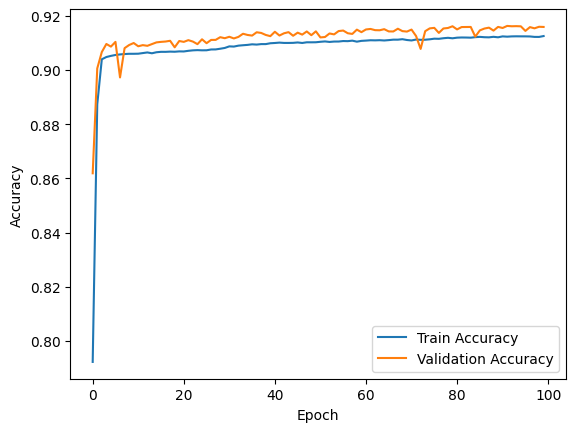

In [ ]:
history_results = [history_proposed_model, history_cnn_model, history_lstm]
titles = ["MLP Propuesto", "Convolucional", "Recurrente"]
for history, title in zip(history_results, titles):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    #plt.plot(history.history['loss'], label='Loss')
    #plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

3173/3173 [==============================] - 14s 4ms/step
        target
283751       2
125354       1
39709        2
81709        2
153482       1
...        ...
39665        2
245765       1
49959        2
8876         1
164336       1

[101511 rows x 1 columns]


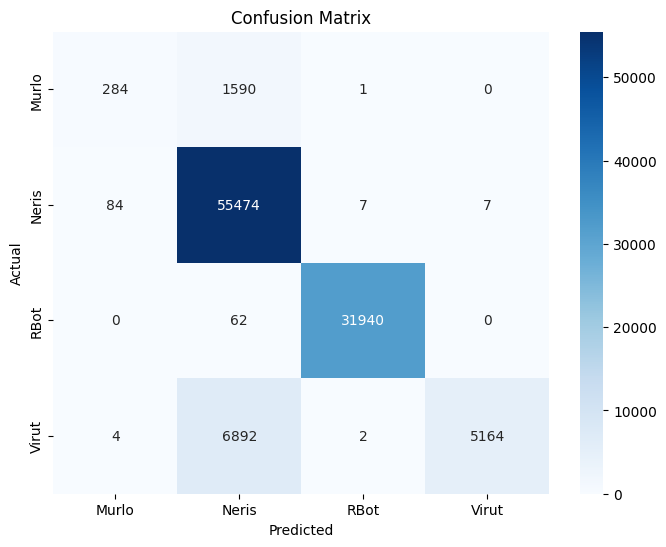

              precision    recall  f1-score   support

           0       0.76      0.15      0.25      1875
           1       0.87      1.00      0.93     55572
           2       1.00      1.00      1.00     32002
           3       1.00      0.43      0.60     12062

    accuracy                           0.91    101511
   macro avg       0.91      0.64      0.69    101511
weighted avg       0.92      0.91      0.90    101511



In [ ]:
models = [model, model_cnn, model_lstm]
for md, title in zip(models, titles):
    #predictions = model.predict(testX)
    predictions = md.predict(testX)
    predictions = predictions.argmax(axis=1) 
    #true_labels = testY.argmax(axis=1)
    true_labels = testY.copy()
    #print(true_labels)
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Murlo','Neris','RBot','Virut'], yticklabels=['Murlo','Neris','RBot','Virut'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()
    print(f"Resultados para {title}:")
    print(classification_report(true_labels, predictions))

### __Ajustar codificadores one-hot__